# **Análisis de datos exploratorio (EDA) sobre Dataset de terremotos en Chile**

![Chile_Flag](https://st5.depositphotos.com/18064944/68375/v/450/depositphotos_683752866-stock-illustration-national-flag-of-chile-that.jpg)

Github: https://github.com/IgnaBascu







# 1) Introducción


Chile, ubicado en el Cinturón de Fuego del Pacífico, es uno de los países más propensos a sufrir terremotos en el mundo. La combinación de la convergencia de placas tectónicas, particularmente la placa de Nazca y la placa Sudamericana, junto con la presencia de la Fosa de Atacama y la Fosa de Chile, hace que la actividad sísmica sea una realidad constante en esta nación sudamericana.



# 2) Objetivo

El objetivo de este estudio es analizar los datos de terremotos ocurridos en Chile, con el fin de comprender la frecuencia, magnitud, distribución geográfica y patrones temporales de la actividad sísmica en la región. A partir de este análisis, se buscará identificar tendencias, áreas de mayor riesgo sísmico y posibles factores desencadenantes de terremotos en Chile.

Sobretodo a modo de demostración de conocimientos mediante la utilización de técnicas de manipulación y análisis de datos para explorar y entender la actividad sísmica en Chile.


# 3) Dataset

El dataset a utilizar fue descargado de la página de Kaggle, el cual contiene 5 features medidas que son:

* **Date(UTC)**: Timestamp en el cual fue registrado el terremoto.
* **Latitude/Longitude**: Localización del terremoto.
* **Depth**: Profundidad del terremoto (en KM).
* **Magnitude**: Magnitud del terremoto (escala Richter).

Fuente: https://www.kaggle.com/datasets/nicolasgonzalezmunoz/earthquakes-on-chile/data

***Las fechas de registro van desde el 2012-01-01 hasta el 2024-01-24 que es el último registro del dataset a la fecha.***



# 4) Manos a la obra!

### a) Importar Librerías

In [78]:
# Librerias para manipulación datos
import numpy as np
import pandas as pd

# Librerías para visualización datos
import matplotlib.pyplot as plt
import seaborn as sns

### b) Importar dataset

El dataset es un archivo .csv, el cual subiremos a un Google drive para su lectura.

In [49]:
url = 'https://drive.google.com/uc?id=1aCuWt-YkpwYxBiIe2FqyG2mm0TRdmDdG'

# Leer el archivo CSV
df = pd.read_csv(url)

df

,Date(UTC),Latitude,Longitude,Depth,Magnitude
0,2024-01-24 08:05:10,-22.17,-68.77,132,5.4
1,2023-12-24 03:23:41,-38.13,-74.16,36,5.4
2,2023-12-21 16:21:52,-21.92,-70.25,55,5.8
3,2023-12-16 22:15:44,-37.05,-74.23,16,4.6
4,2023-12-11 18:36:01,-24.20,-67.10,223,5.9
...,...,...,...,...,...
3612,2012-03-24 07:28:33,-33.05,-71.06,69,5.2
3613,2012-03-19 21:52:39,-25.00,-69.75,100,5.0
3614,2012-03-10 02:26:57,-19.74,-69.25,101,5.3
3615,2012-03-04 16:27:20,-21.60,-70.06,47,5.3


### c) Limpieza de datos y análisis estadístico

Para ver la información de las columnas del dataframe, ocupamos el método **`info`**

In [50]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3617 entries, 0 to 3616
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date(UTC)  3617 non-null   object 
 1   Latitude   3617 non-null   float64
 2   Longitude  3617 non-null   float64
 3   Depth      3617 non-null   int64  
 4   Magnitude  3617 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 141.4+ KB
None


Observamos que el dataset esta completo con datos (**`non-null`**), por lo que no es necesario llenar celdas faltantes o eliminarlas según sea el caso. El dataset contiene 1 columna de números enteros (**`int64`**), 3 números reales (**`float64`**) y una columna que contiene el tipo (**`object`**) que representa la fecha con su formato en específico.



In [51]:
df.isna()

,Date(UTC),Latitude,Longitude,Depth,Magnitude
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
3612,False,False,False,False,False
3613,False,False,False,False,False
3614,False,False,False,False,False
3615,False,False,False,False,False


Ocupando el método (**`isna`**) vemos que no existen valores nulos o perdidos, en concordancia con el método anterior.

Otro método que podemos ocupar es el de **`describe`** que nos muestra las principales características estadísticas de las columnas o features númericas (int64 y float64).





In [52]:
df.describe()

,Latitude,Longitude,Depth,Magnitude
count,3617.000000,3617.000000,3617.000000,3617.000000
mean,-27.851639,-70.861510,60.989771,4.449571
std,5.923018,1.302008,38.551098,0.683683
min,-62.350000,-75.460000,2.000000,2.300000
25%,-31.800000,-71.600000,35.000000,4.000000
50%,-29.720000,-71.200000,49.000000,4.400000
75%,-21.520000,-70.050000,85.000000,4.800000
max,-11.070000,-58.390000,624.000000,8.400000


Descripción:

* Nos muestra que existen para cada columna 3617 valores.
* Promedios relevantes como la profundidad de 60.9 Km y la magnitud 4.4
* Menor profundidad fue 2 Km y magnitud 2.3 registrados respectivamente
* Nos muestra los cuartiles al 25%, 50% y 75% que son medidas de posición que agrupan los datos en 4 partes iguales.

En este caso, lo más relevante es que del grupo de datos, el 75% de ellos ha sido de magnitud 4.8 o menor.

* Y el máximo dato asociado que podemos ver que de profundidad ha sido 624 Km y de magnitud 8.4 respectivamente.

*`PD: El mayor terremoto registrado en Chile ha sido el megaterremoto de Valdiva el 22 de mayo de 1960 que registró una magnitud de 9.5`*

### d) Modificación del Dataframe

Se puede realizar varias operaciones sobre el dataframe por ejemplo adicionar alguna columna, eliminar alguna fila en especifico, que se muestren los datos en cierto filtro, etc.

Aprovechando que tenemos las longitudes y latitudes registrados de los terremotos, podemos agregar una columna que indique la región en donde ocurrieron.

Acá se creó un script el cual mediante la librería **`request`** se llamó a la API de OpenStreetMaps que mediante el uso de la latitud y longitud se determinó su región y se creó una nueva columna asociandola respectivamente.

Este paso es bastante largo (+ de 20 min) por lo que se dejó comentado y el archivo creado se deja a disposición en la carpeta `recursos`.

In [ ]:
'''import requests

num = 0

def obtener_region_openmaps(latitud, longitud):
    global num
    url = f"https://nominatim.openstreetmap.org/reverse?lat={latitud}&lon={longitud}&format=json"
    response = requests.get(url)
    data_map = response.json()
    address = data_map.get('address', {})
    state = address.get('state', 'Fuera del país')
    num += 1
    print(num)
    return state

# Aplicar la función obtener_region_openmaps a cada fila del DataFrame
df['Region'] = df.apply(lambda row: obtener_region_openmaps(row['Latitude'], row['Longitude']), axis=1)

# Mostrar el DataFrame con la nueva columna de región
print(df)'''


In [71]:
# Exportar el DataFrame a CSV
df.to_csv('df_regiones.csv', encoding='utf-8', index=False)


In [75]:
# Vemos si agregó la columna ['Region'] al df original
df.head()

,Date(UTC),Latitude,Longitude,Depth,Magnitude,Region
0,2024-01-24 08:05:10,-22.17,-68.77,132,5.4,Región de Antofagasta
1,2023-12-24 03:23:41,-38.13,-74.16,36,5.4,Fuera del país
2,2023-12-21 16:21:52,-21.92,-70.25,55,5.8,Fuera del país
3,2023-12-16 22:15:44,-37.05,-74.23,16,4.6,Fuera del país
4,2023-12-11 18:36:01,-24.20,-67.10,223,5.9,Salta


### e) Visualización de datos

Ya con los datos listos podemos iniciar nuestra inspección visual con diversos gráficos para explorar insigths y llegar a conclusiones.

**Scatter Plot**

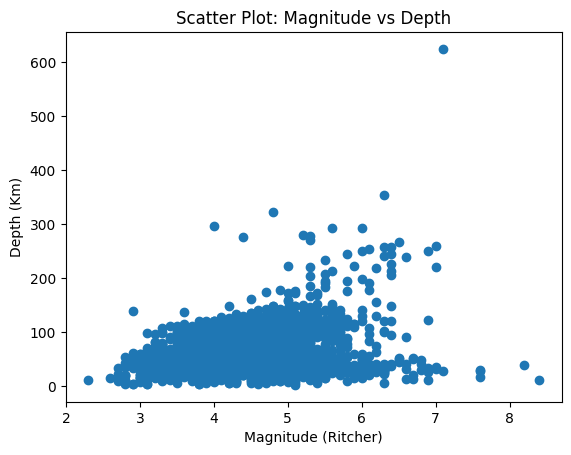

In [82]:
plt.scatter(df['Magnitude'], df['Depth'])
plt.xlabel('Magnitude (Ritcher)')
plt.ylabel('Depth (Km)')
plt.title('Scatter Plot: Magnitude vs Depth')
plt.show()

Se observa que la mayoría de los eventos registrados se encuentran por debajo de los 200 Km de profundidad (depth) y entre la magnitud 3 y 6 en la escala sismológica de Richter.

**Histograma**

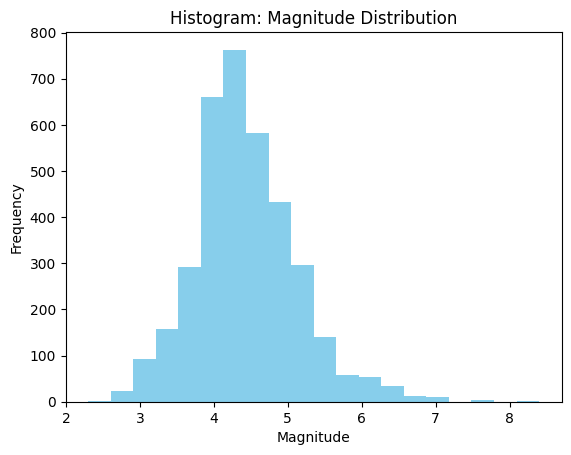

In [84]:
plt.hist(df['Magnitude'], bins=20, color='skyblue')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.title('Histograma: Distribución de magnitudes')
plt.show()

En el histograma se aprecia una frecuencia mayor de magnitudes entre 4 y 5, lo cual concuerda con la media de estas que nos dió 4.4 .

**Gráfico de barras (Bar Plot)**

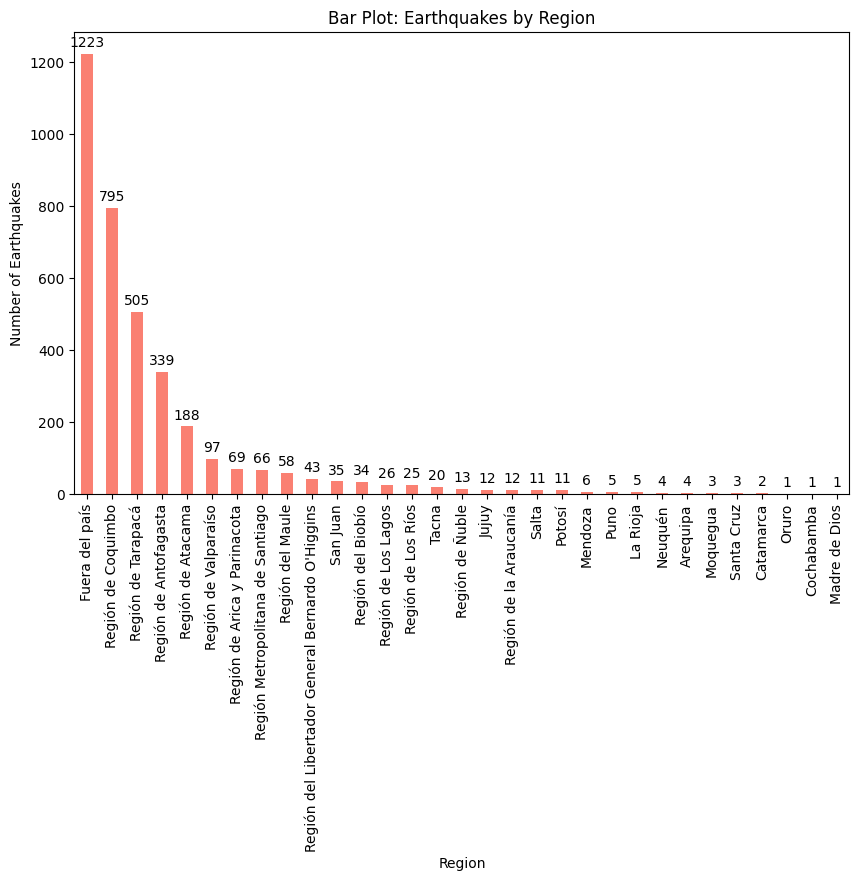

In [90]:
plt.figure(figsize=(10, 6))
ax = df['Region'].value_counts().plot(kind='bar', color='salmon')

# Agregar números de cada región
for i, value in enumerate(df['Region'].value_counts()):
    ax.text(i, value + 20, str(value), ha='center')

plt.xlabel('Region')
plt.ylabel('Number of Earthquakes')
plt.title('Bar Plot: Earthquakes by Region')
plt.show()



Al contabilizar los eventos, la mayor cantidad de estos se registran fuera del país (fuera del territorio nacional terrestre) seguidos por la Región de Coquimbo y Región de Tarapacá.

Esta tendencia a registros más frecuentes en la zona norte del país, se puede explicar a la energía residual latente que tienen estas zonas.

Según geólogos expertos:

**"Respecto a la preocupación por una ventana sísmica entre La Serena y San Antonio, Salazar afirmó que "está demostrado científicamente, en Chile hay tres zonas vulnerables que ya tienen suficiente energía acumulada para generar terremotos sobre 8 grados.**

**Entre Punta Patache al sur de Iquique y la Península de Mejillones en la zona de Antofagasta, eso quiere decir que es la zona donde la energía va a romper, va afectar a la zona de Iquique y Antofagasta", reveló, tras esto mencionó que la otra está entre Bahía Inglesa y Huasco, en la desembocadura del río Copiapó y la otra entre Los Vilos y Pichilemu, que históricamente se había pensado que el 3 de marzo del 85 había liberado toda la energía."**

Fuente: https://www.13.cl/programas/tu-dia/momentos/geologo-aseguro-que-hay-tres-zonas-en-chile-propensas-a-terremotos-cuale-1

**Mapa de Correlación**

<ipython-input-94-ae3fe3c8d182>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


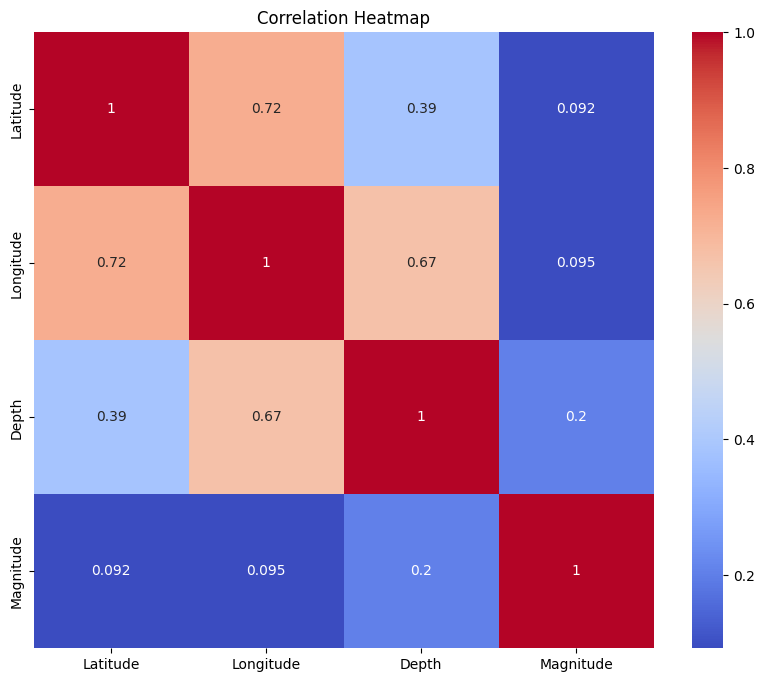

In [94]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Crea el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [95]:
print(correlation_matrix)

           Latitude  Longitude     Depth  Magnitude
Latitude   1.000000   0.724878  0.385562   0.092329
Longitude  0.724878   1.000000  0.667633   0.095205
Depth      0.385562   0.667633  1.000000   0.204700
Magnitude  0.092329   0.095205  0.204700   1.000000


La matriz de correlación proporciona información sobre la relación entre las diferentes características (variables) en tu conjunto de datos. Cada valor en la matriz representa el coeficiente de correlación entre dos características particulares.

En este caso se pueden observar dos conjuntos:

* Correlación fuerte positiva (una sube y la otra igual) entre el par Latitud-Longitud: A mayor longitud , mayor latitud del evento. Tal bez relacionada con la ubicación del cinturón de fuego; y el par Longitud-Profundidad relacionado con lo mismo.

* Correlación débil (cercanas a cero) entre las demás relaciones. Aunque uno asumiera que a menor profundidad, mayor es la magnitud del evento, esta muestra una correlación positiva bastante débil por lo que no se puede aseverar dicha concepción.

### f) Preguntas

Proponemos una serie de preguntas asociadas al trabajo realizado:

1) **Magnitud promedio de los terremotos**

In [96]:
mag_media = df['Magnitude'].mean()
print("Magnitud media:", mag_media)


Magnitud media: 4.449571468067459


**2) Región con la mayor cantidad de terremotos**

In [101]:
region_mas_activa = df[df['Region'] != 'Fuera del país']['Region'].value_counts().idxmax()
print("Region más activa (excluyendo 'Fuera del país'):", region_mas_activa)


Region más activa (excluyendo 'Fuera del país'): Región de Coquimbo


**3) Distribución de las magnitudes por Región**


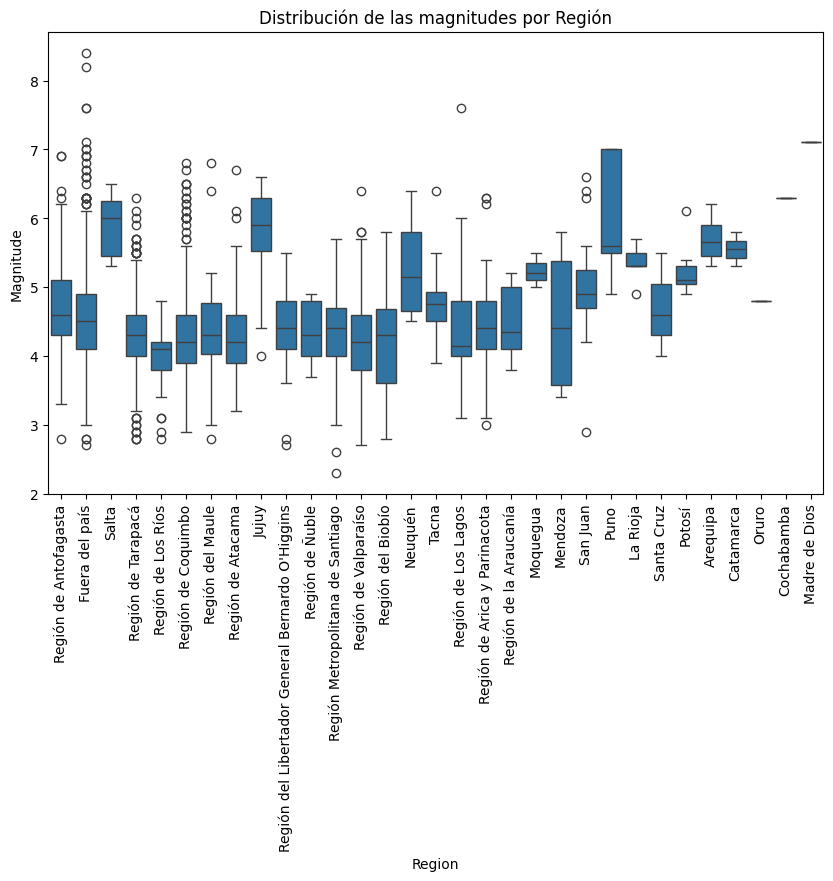

In [103]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Magnitude', data=df)
plt.xticks(rotation=90)
plt.title('Distribución de las magnitudes por Región')
plt.show()


**4) Lista los 10 terremotos más grandes de magnitud de mayor a menor**

In [105]:
df_ordenado = df.sort_values(by='Magnitude', ascending=False)

df_ordenado.head(10)

,Date(UTC),Latitude,Longitude,Depth,Magnitude,Region
3134,2015-09-16 22:54:28,-31.55,-71.86,11,8.4,Fuera del país
3554,2014-04-01 23:46:45,-19.57,-70.91,39,8.2,Fuera del país
3527,2014-04-03 02:43:15,-20.52,-70.44,28,7.6,Fuera del país
3130,2015-09-16 23:18:35,-31.59,-71.79,16,7.6,Fuera del país
2478,2016-12-25 14:22:23,-43.52,-74.39,30,7.6,Región de Los Lagos
3133,2015-09-16 22:59:15,-31.62,-71.75,27,7.1,Fuera del país
1949,2018-08-24 09:04:07,-11.07,-70.79,624,7.1,Madre de Dios
1085,2020-09-01 04:09:27,-27.97,-71.24,31,7.0,Fuera del país
2117,2018-01-14 09:18:44,-15.77,-74.67,35,7.0,Fuera del país
353,2022-05-26 12:02:17,-14.70,-70.60,221,7.0,Puno


**5) Lista el mayor terremoto de cada región**

In [106]:
# Encontrar el índice del mayor terremoto en cada región
idxmax_por_region = df.groupby('Region')['Magnitude'].idxmax()

# Seleccionar filas
df_top_region = df.loc[idxmax_por_region]

print(df_top_region)


                Date(UTC)  Latitude  Longitude  Depth  Magnitude  \
1183  2020-05-31 05:09:37    -15.82     -71.22    218        6.2   
1622  2019-05-24 20:16:01    -27.91     -66.95    176        5.8   
1719  2019-03-15 05:03:51    -17.85     -65.91    353        6.3   
3134  2015-09-16 22:54:28    -31.55     -71.86     11        8.4   
3240  2015-02-11 18:57:19    -23.17     -66.86    239        6.6   
2509  2016-11-13 14:01:04    -29.26     -67.90    140        5.7   
1949  2018-08-24 09:04:07    -11.07     -70.79    624        7.1   
558   2021-11-03 03:17:47    -32.66     -70.11    113        5.8   
314   2022-07-12 23:36:13    -16.73     -71.26     15        5.5   
54    2023-07-17 03:05:10    -38.22     -70.86    206        6.4   
1694  2019-04-01 10:19:50    -18.16     -67.57    323        4.8   
2464  2017-01-06 06:30:33    -22.31     -67.92    177        6.1   
353   2022-05-26 12:02:17    -14.70     -70.60    221        7.0   
879   2021-01-24 00:07:44    -33.35     -70.21  

# **Análisis hecho con fines educativos y demostración de habilidades**

# Github: https://github.com/IgnaBascu